# HIV Gene Expression Signature Analysis

*Denis Torre*

## 1. Preparation

### Load Scripts

In [12]:
##############################
##### 1. Python Modules
##############################
import pandas as pd

##############################
##### 2. R Libraries
##############################
%load_ext rpy2.ipython
%R library(DESeq2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython

Error in library(DESeq2) : there is no package called ‘DESeq2’


/Users/denis/my-venv/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in library(DESeq2) : there is no package called ‘DESeq2’

  warnings.warn(x, RRuntimeWarning)


### Load Data

#### Rawcount Dataframe

In [23]:
# Get input file
infile = '../f1-expression_data.dir/hiv-rawcounts.txt'

# Read dataframe
rawcountDataframe = pd.read_table(infile).set_index('gene_symbol').dropna()
rawcountDataframe.head()

,B10C,B11C,B11G,B11N,B12G,B12N,B1C,B1G,B1N,B2C,...,h24.3,h24.4,h48.2,h48.3,h48.4,h6.2,h6.3,h6.4,NK1,NK2
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,49.0,59.0,50.0,44.0,40.0,43.0,48.0,91.0,39.0,55.0,...,77.0,23.0,26.0,142.0,30.0,14.0,107.0,33.0,26.0,120.0
A1CF,43.0,40.5,57.0,45.0,76.0,47.5,52.5,27.0,59.5,41.0,...,68.0,69.0,50.5,53.5,86.0,39.0,63.0,102.5,1640.5,599.5
A2M,131.0,157.0,169.0,121.0,207.0,123.0,222.0,133.0,199.0,251.0,...,111.0,99.0,49.0,94.0,85.0,54.0,124.0,118.0,10396.0,24076.0
A2M-AS1,36.0,21.0,39.0,29.0,52.0,25.0,14.0,29.0,30.0,36.0,...,26.0,103.0,79.0,17.0,107.0,70.0,12.0,58.0,43.0,44.0
A2ML1,83.0,97.0,102.0,57.0,122.0,49.0,102.0,110.0,99.0,142.0,...,122.0,147.0,96.0,78.0,127.0,95.0,114.0,129.0,24.0,56.0


#### Annotation Dataframe

In [24]:
# Get input file
infile = '../rawdata/hiv_sample_annotation.txt'

# Read dataframe
annotationDataframe = pd.read_table(infile).set_index('sample_name')
annotationDataframe.head()

,cell_type,treatment,timepoint
sample_name,,,
B10C,primary_podocyte,untreated,NaN
B11C,primary_podocyte,untreated,NaN
B11G,primary_podocyte,gfp_control,NaN
B11N,primary_podocyte,hiv_infection,NaN
B12G,primary_podocyte,gfp_control,NaN


#### Split Rawcount Dataframe

In [25]:
# Get Podocyte samples
podocyteSamples = annotationDataframe.index[annotationDataframe['cell_type'] == 'primary_podocyte']
podocyteRawcountDataframe = rawcountDataframe[podocyteSamples]

# Get cell line samples
cellLineSamples = annotationDataframe.index[annotationDataframe['cell_type'] == 'cell_line']
cellLineRawcountDataframe = rawcountDataframe[cellLineSamples]

## 2. Exploratory Data Analysis

### 2.1 Library Sizes

#### Calculate Library Sizes

In [29]:
%%R -i podocyteRawcountDataframe,cellLineRawcountDataframe,annotationDataframe

# Create dataframe list
rawcountData = list(podocyte=podocyteRawcountDataframe, cellLine=cellLineRawcountDataframe)

# Calculate library sizes
librarySizes = sapply(rawcountData, colSums)
librarySizes

$podocyte
    B10C     B11C     B11G     B11N     B12G     B12N      B1C      B1G 
34394237 36481316 36486558 24166981 36160060 20646442 34088425 36884080 
     B1N      B2C      B2G      B2N      B3C      B3G      B3N      B8N 
33732760 35392753 34645759 33220643 34171208 36006572 29931472 21971167 
     B9C      B9G      B9N      NK1      NK2 
34718480 28857612 26324330 18142254 29331108 

$cellLine
    h0.2     h0.3     h0.4    h12.3    h12.4    h24.3    h24.4    h48.2 
31644642 34982486 35059328 36401424 36323960 33844946 36142796 25424480 
   h48.3    h48.4     h6.2     h6.3     h6.4 
31300713 32191780 27290836 35665028 36504833 



#### Plot Sizes

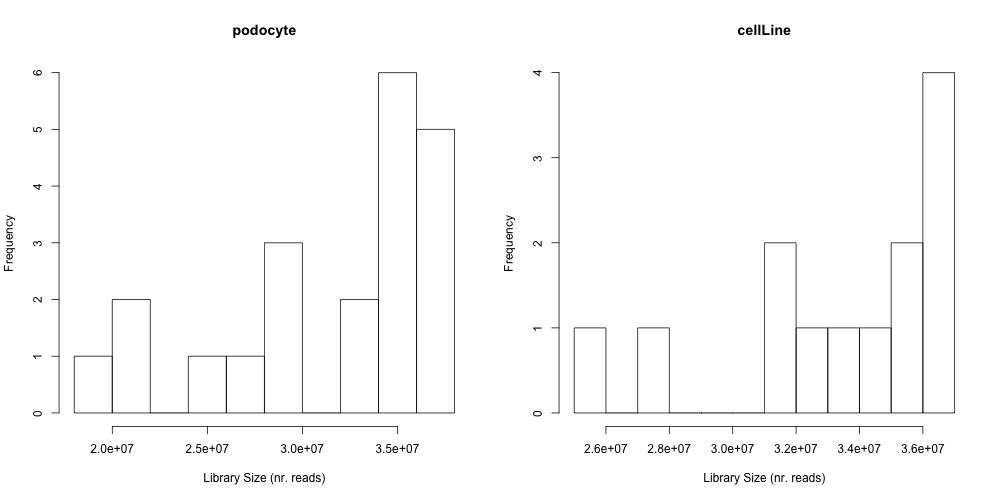

In [37]:
%%R -h 500 -w 1000

# Setup plot
par(mfrow=c(1,2))

# Loop through datasets
for (label in names(rawcountData)) {
    
    # Plot
    hist(librarySizes[[label]],
         xlab = 'Library Size (nr. reads)',
         main=label,
         breaks=10)
    
}

### 2.2 PCA Analysis

In [ ]:
%%R

